## Install libraries

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.2/804.2 kB 9.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nRsx8k1jTup7B0E47mJn")
project = rf.workspace("tennis-ai").project("football-boxes")
version = project.version(1)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.61, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to football-boxes-1 in yolov8:: 100%|██████████| 1334/1334 [00:00<00:00, 4086.06it/s]


## Import Toolkits

In [6]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from IPython.display import display , Video
import itertools
import os
import shutil
import requests

Ultralytics YOLOv8.2.61 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


## Show Sample Of Training Data

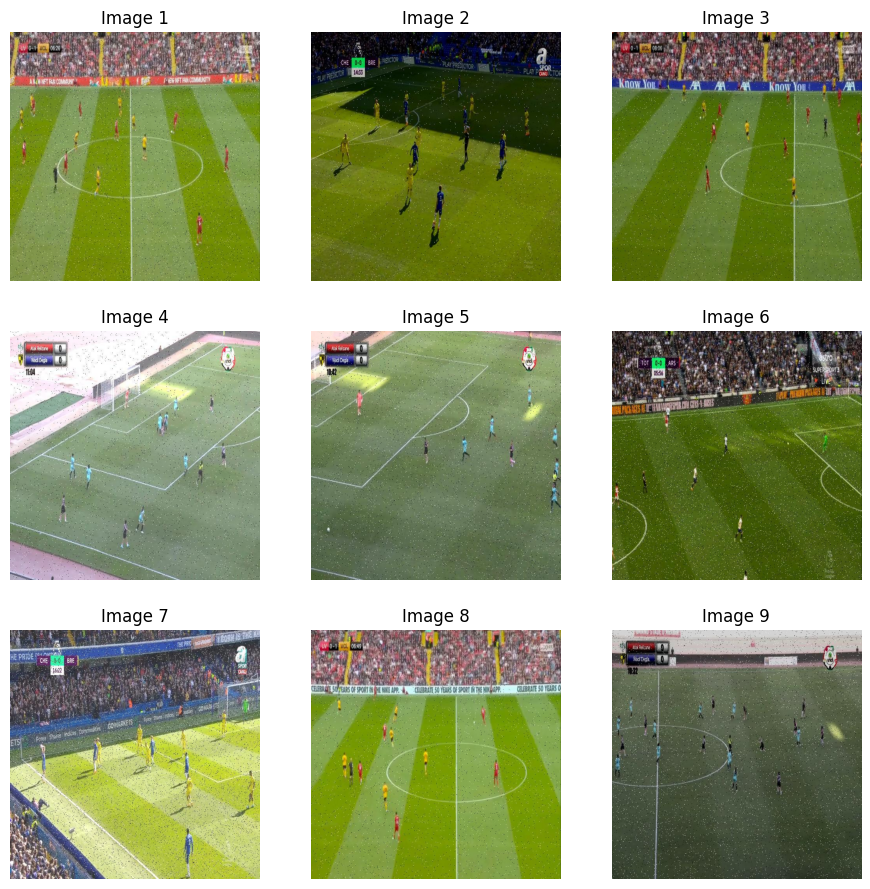

In [10]:
img_dir = '/content/football-boxes-1/train/images'
n_samples = 9
img_files = os.listdir(img_dir)
rand_imgs= random.sample(img_files , n_samples)
fig , axes = plt.subplots(3,3, figsize=(11,11))

for i in range(n_samples):
  img = rand_imgs[i]
  ax = axes[i//3 , i%3]
  ax.imshow(plt.imread(os.path.join(img_dir , img)))
  ax.axis('off')
  ax.set_title(f"Image {i+1}")
plt.tight_layout
plt.show();

## Train YOLOV8 On Custom Data

In [12]:
#Load The Model
final_model = YOLO('yolov8n-seg.yaml').load('yolov8n-seg.pt')

#Train The Model
results = final_model.train(data= '/content/football-boxes-1/data.yaml', epochs = 25 , imgsz= 640)

Transferred 417/417 items from pretrained weights
Ultralytics YOLOv8.2.61 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=/content/football-boxes-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

100%|██████████| 755k/755k [00:00<00:00, 4.61MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 21.3MB/s]


AMP: checks passed ✅


train: Scanning /content/football-boxes-1/train/labels... 576 images, 0 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<00:00, 1709.87it/s]

train: New cache created: /content/football-boxes-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/football-boxes-1/valid/labels... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 1086.81it/s]

val: New cache created: /content/football-boxes-1/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.32G     0.8414      2.781      3.124       1.25        130        640: 100%|██████████| 36/36 [00:24<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         54        235     0.0366      0.811      0.329      0.295     0.0365      0.805      0.325      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.96G     0.5714     0.9372      1.733       1.03        138        640: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         54        235      0.558        0.5      0.552      0.492      0.561        0.5      0.548      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.05G     0.5197      0.749      1.377     0.9858        131        640: 100%|██████████| 36/36 [00:17<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all         54        235      0.593      0.779      0.713       0.63      0.593      0.779      0.711      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.88G     0.4753     0.6252      1.234     0.9707        117        640: 100%|██████████| 36/36 [00:16<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         54        235      0.653       0.83      0.745       0.66      0.634      0.824      0.725      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.94G     0.4554     0.6135      1.158     0.9598        116        640: 100%|██████████| 36/36 [00:16<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         54        235      0.638      0.929      0.769      0.677       0.63      0.921      0.759      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.91G     0.4185      0.558      1.086     0.9408        142        640: 100%|██████████| 36/36 [00:15<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all         54        235      0.719      0.867      0.816      0.747      0.719      0.867      0.816      0.746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.95G      0.411     0.5269      1.032     0.9339        111        640: 100%|██████████| 36/36 [00:16<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         54        235      0.695      0.915      0.797      0.741      0.695      0.915      0.797      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/25         3G     0.3918     0.5073      0.992     0.9253        121        640: 100%|██████████| 36/36 [00:16<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         54        235      0.717      0.937      0.806       0.75      0.716      0.938      0.802      0.755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.94G     0.3804     0.4625      0.959     0.9223        152        640: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         54        235      0.781      0.942       0.89       0.83      0.781      0.942       0.89      0.832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.94G      0.375     0.4507     0.8814      0.919        155        640: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         54        235      0.731      0.888      0.871      0.818      0.728      0.884      0.864      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.92G     0.3564     0.4462     0.8198     0.9181        135        640: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         54        235       0.81      0.843      0.882      0.831       0.81      0.843      0.882      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.98G     0.3522     0.4351     0.7918     0.9075        142        640: 100%|██████████| 36/36 [00:18<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         54        235       0.85      0.858      0.901      0.853      0.839      0.883      0.901      0.842



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.94G     0.3436     0.4237     0.7635      0.912        155        640: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         54        235      0.874      0.904      0.942        0.9       0.87        0.9      0.939      0.884



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.92G     0.3331     0.4186     0.7063     0.9029        127        640: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         54        235      0.862      0.886      0.918      0.879      0.862      0.886      0.918       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/25       2.9G     0.3315      0.412     0.6681     0.8958        140        640: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         54        235      0.934      0.942      0.975       0.94      0.934      0.942      0.975      0.934


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.98G     0.3651     0.5554     0.7803     0.9178         58        640: 100%|██████████| 36/36 [00:20<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         54        235      0.916      0.946      0.956      0.924      0.916      0.946      0.956      0.896



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.71G     0.3359     0.4602     0.6729      0.895         61        640: 100%|██████████| 36/36 [00:15<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         54        235      0.909      0.943      0.948      0.907      0.905      0.939      0.947      0.892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.73G     0.3259     0.4652     0.6309     0.8886         71        640: 100%|██████████| 36/36 [00:15<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         54        235       0.95      0.944      0.983      0.953       0.95      0.944      0.983      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.71G     0.3121     0.4327     0.6019     0.8783         62        640: 100%|██████████| 36/36 [00:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         54        235      0.973      0.931      0.981       0.95      0.973      0.931      0.981      0.937



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.71G     0.3059     0.4242     0.5778     0.8708         60        640: 100%|██████████| 36/36 [00:15<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         54        235       0.98      0.959      0.986      0.953       0.98      0.959      0.986      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.72G     0.2928     0.3953     0.5458     0.8689         64        640: 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         54        235      0.947      0.971      0.981      0.956      0.947      0.971      0.981      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.73G     0.2791     0.3712     0.5098      0.861         65        640: 100%|██████████| 36/36 [00:15<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         54        235      0.968      0.958      0.983       0.96      0.974      0.962      0.984      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.73G      0.271     0.3648     0.5075     0.8581         60        640: 100%|██████████| 36/36 [00:13<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         54        235      0.961       0.96      0.977       0.95      0.961       0.96      0.977      0.925



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.73G      0.266     0.3713      0.502      0.865         57        640: 100%|██████████| 36/36 [00:13<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all         54        235      0.969      0.953      0.983      0.962      0.976      0.958      0.983      0.937



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/25       2.7G     0.2605     0.3961     0.4883     0.8558         63        640: 100%|██████████| 36/36 [00:13<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         54        235      0.968      0.959      0.984      0.965      0.974      0.962      0.985       0.94



25 epochs completed in 0.137 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.61 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,429 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]


                   all         54        235      0.967      0.959      0.984      0.966      0.974      0.962      0.985       0.94
         18Yard Circle         31         31       0.98          1      0.995      0.951      0.981          1      0.995      0.908
                18Yard         36         36      0.937      0.972      0.972      0.953      0.938      0.972      0.972      0.896
                 5Yard         21         21      0.948      0.877      0.951      0.889      0.984      0.905      0.953      0.868
First Half Central Circle         32         32      0.945          1      0.994      0.994      0.949          1      0.994      0.986
      First Half Field         38         38      0.985      0.947      0.994      0.994      0.987      0.947      0.994      0.983
Second Half Central Circle         33         33          1      0.942      0.995      0.988          1      0.935      0.995      0.951
     Second Half Field         44         44      0.977      0

## Let`s Build The Graph

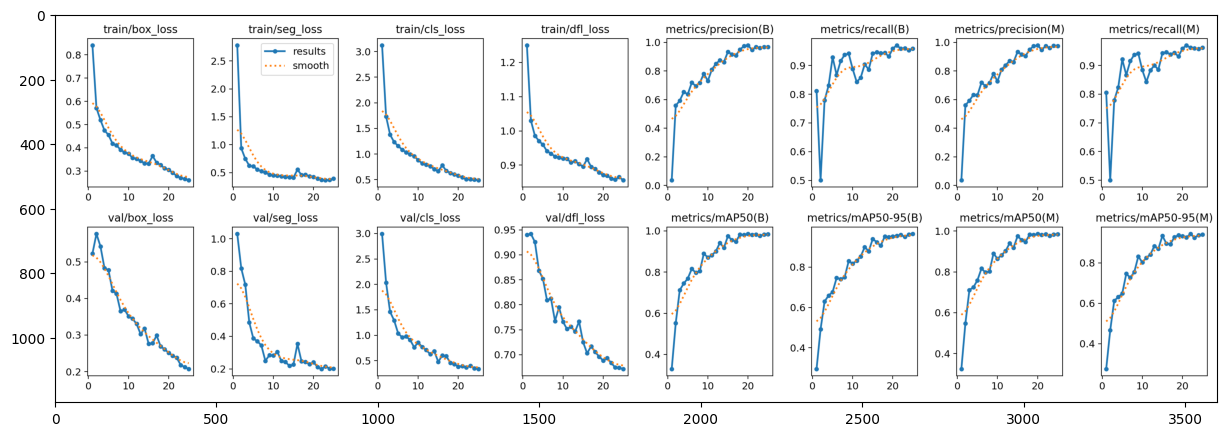

In [13]:
F1_curve = Image.open("/content/runs/segment/train/results.png")
plt.figure(figsize= (15,20))
plt.imshow(F1_curve)
plt.show();

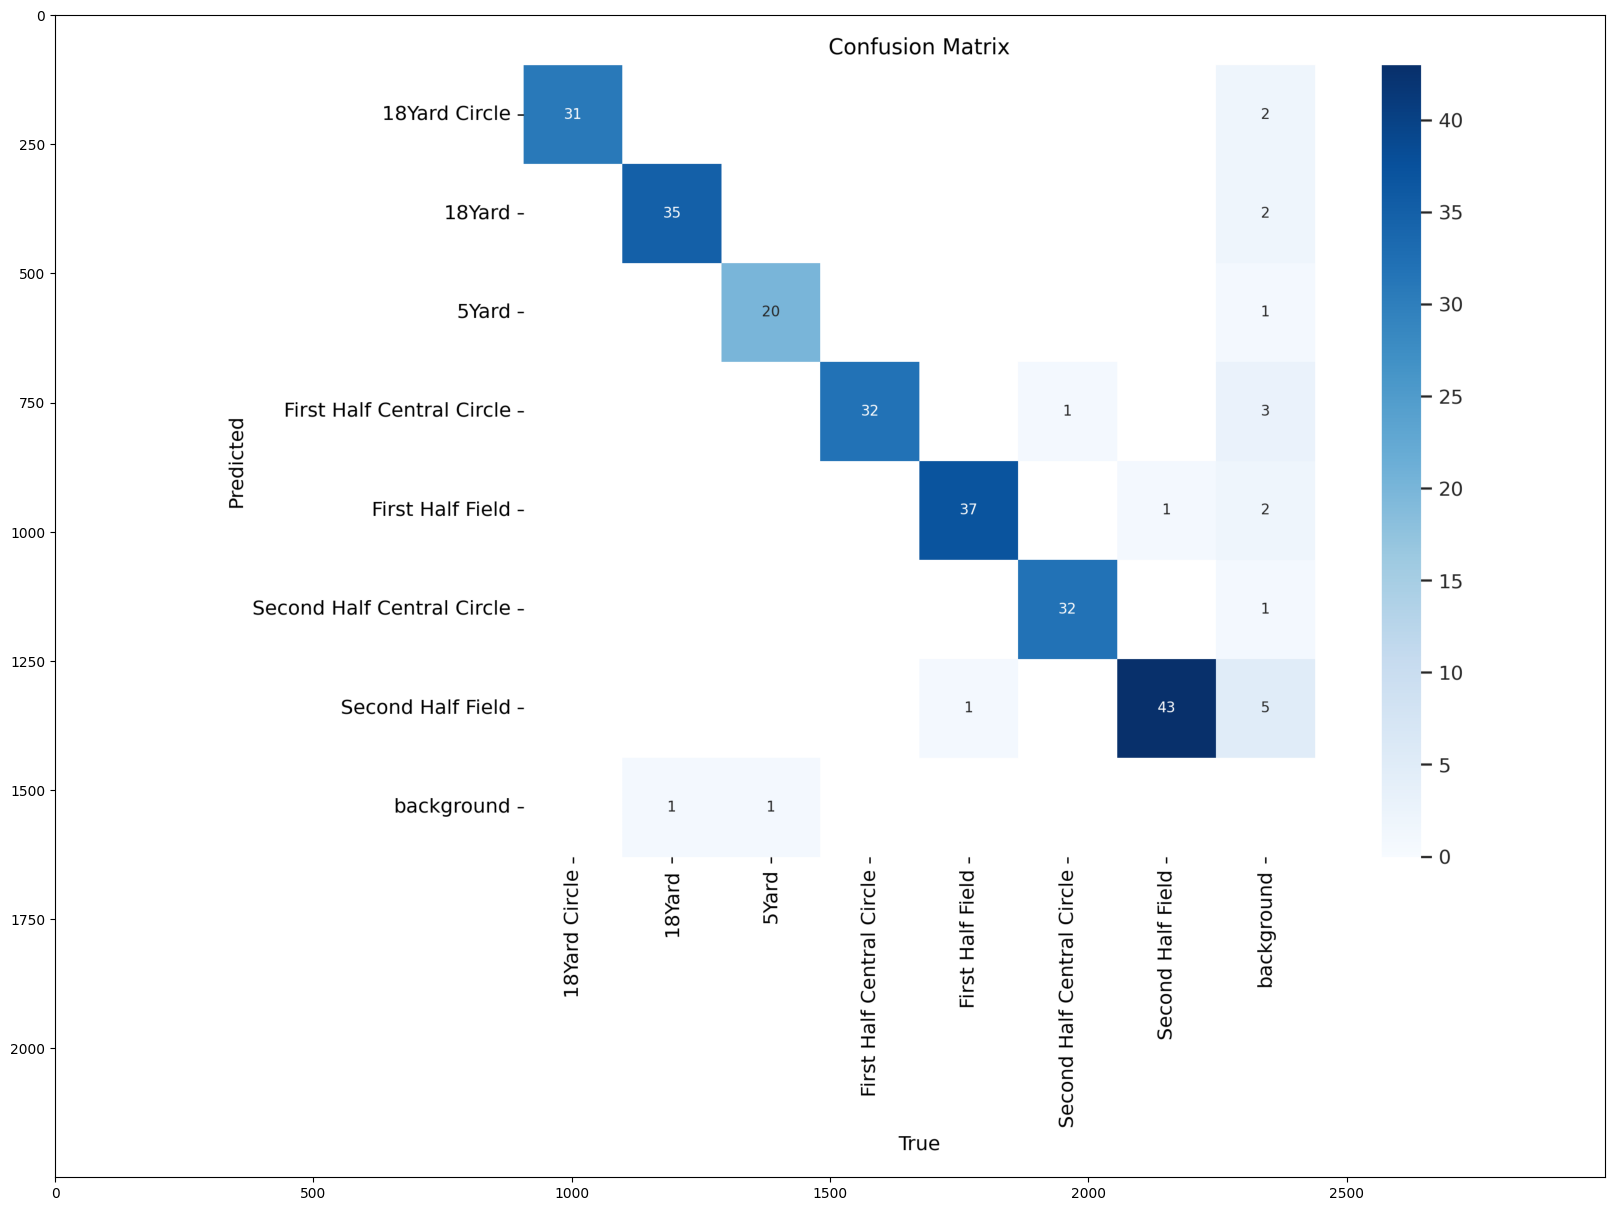

In [14]:
confusion_matrix = Image.open("/content/runs/segment/train/confusion_matrix.png")
plt.figure(figsize=(20,20))
plt.imshow(confusion_matrix)
plt.show();

## Inference With Custom Model

In [19]:
model = YOLO("/content/runs/segment/train/weights/best.pt")
model.predict(source="/content/football-boxes-1/test/images", conf = 0.25)


image 1/31 /content/football-boxes-1/test/images/ArsTot_mp4-18_jpg.rf.55e360bbbec9190a2504726f91cec0f8.jpg: 640x640 1 18Yard Circle, 1 18Yard, 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 18.7ms
image 2/31 /content/football-boxes-1/test/images/ArsTot_mp4-21_jpg.rf.403a2af1eecf8d524888ee791b87d3c8.jpg: 640x640 1 18Yard, 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 19.0ms
image 3/31 /content/football-boxes-1/test/images/ArsTot_mp4-25_jpg.rf.cd8c474be94344acef17a71a33e37963.jpg: 640x640 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 19.4ms
image 4/31 /content/football-boxes-1/test/images/ArsTot_mp4-8_jpg.rf.9db7e5390ad83907d8a9068606d418a6.jpg: 640x640 1 18Yard Circle, 1 18Yard, 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 16.3ms
image 5/31 /content/football-boxes-1/test/im

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '18Yard Circle', 1: '18Yard', 2: '5Yard', 3: 'First Half Central Circle', 4: 'First Half Field', 5: 'Second Half Central Circle', 6: 'Second Half Field'}
 obb: None
 orig_img: array([[[ 76,  76, 106],
         [ 74,  79, 112],
         [124, 137, 175],
         ...,
         [ 62,  61,  71],
         [100,  95, 104],
         [ 63,  58,  67]],
 
        [[ 71,  71, 101],
         [ 74,  79, 112],
         [119, 132, 170],
         ...,
         [ 67,  66,  76],
         [110, 107, 116],
         [ 73,  70,  79]],
 
        [[ 63,  63,  93],
         [ 72,  77, 110],
         [106, 119, 157],
         ...,
         [ 69,  68,  78],
         [117, 116, 125],
         [ 83,  82,  91]],
 
        ...,
 
        [[ 35, 110,  94],
         [ 34, 109,  93],
         [ 34, 109,  93],
         ...,
         [ 4

In [20]:
import glob
from IPython.display import Image, display
for image_path in glob.glob('/content/runs/segment/predict/images/*.jpg')[:20]:
  display(Image(filename=image_path, width=600))
  print('\n')